# Cancer before and after Chernobyl

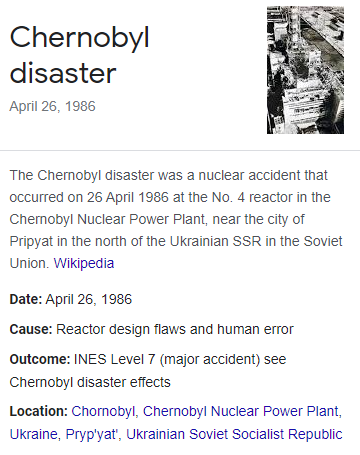

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
cc = pd.read_csv(r'C:\Users\nikki\OneDrive\Pictures\Data Science\Personal Learning\Cancer  Chernobyl\cancer_before_and_after_Chernobyl_Belarus.csv')
cc.head(5)

,year,sex,location,cancer_type,cases
0,1985,women,Gomel,skin,17.3
1,1985,women,Mogilev,skin,16.8
2,1986,women,Gomel,skin,15.6
3,1986,women,Mogilev,skin,18.3
4,1985,women,Belarus,skin,14.9


In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         84 non-null     int64  
 1   sex          84 non-null     object 
 2   location     84 non-null     object 
 3   cancer_type  84 non-null     object 
 4   cases        84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ KB


## No missing data

In [5]:
round(cc.describe(include='all'),2)

,year,sex,location,cancer_type,cases
count,84.0,84,84,84,84.00
unique,NaN,2,3,7,NaN
top,NaN,women,Gomel,skin,NaN
freq,NaN,42,28,12,NaN
mean,1985.5,NaN,NaN,NaN,10.69
std,0.5,NaN,NaN,NaN,13.92
min,1985.0,NaN,NaN,NaN,0.50
25%,1985.0,NaN,NaN,NaN,3.50
50%,1985.5,NaN,NaN,NaN,6.35
75%,1986.0,NaN,NaN,NaN,10.27


In [6]:
cc.year.value_counts()

1985    42
1986    42
Name: year, dtype: int64

In [7]:
cc.sex.value_counts()

women    42
men      42
Name: sex, dtype: int64

In [8]:
cc.location.value_counts()

Gomel      28
Mogilev    28
Belarus    28
Name: location, dtype: int64

In [9]:
cc.cancer_type.value_counts()

skin        12
thyroid     12
lungs       12
pancreas    12
colon       12
rectum      12
kidney      12
Name: cancer_type, dtype: int64

In [49]:
print('Number of Columns is = ',cc.shape[1])
print('Number of Rows is = ',cc.shape[0])

Number of Columns is =  5
Number of Rows is =  84


# EDA

In [38]:
skin_before = before.loc[before['cancer_type']== 'skin']
skin_before.head()

,year,sex,location,cancer_type,cases
0,1985,women,Gomel,skin,17.3
1,1985,women,Mogilev,skin,16.8
4,1985,women,Belarus,skin,14.9
6,1985,men,Gomel,skin,19.9
7,1985,men,Mogilev,skin,20.5


In [53]:
cc.groupby(['cancer_type','year'])['cases'].mean().round(1)

cancer_type  year
colon        1985     5.4
             1986     8.1
kidney       1985     2.4
             1986     5.1
lungs        1985    24.4
             1986    35.7
pancreas     1985     4.7
             1986     6.1
rectum       1985     7.0
             1986     9.7
skin         1985    17.8
             1986    18.9
thyroid      1985     1.1
             1986     3.3
Name: cases, dtype: float64

In [41]:
grouped = cc.groupby(['year','cancer_type']).agg({'cases':'sum'})
grouped

cases
year cancer_type       
1985 colon         32.4
     kidney        14.5
     lungs        146.7
     pancreas      28.0
     rectum        42.2
     skin         106.6
     thyroid        6.4
1986 colon         48.7
     kidney        30.4
     lungs        214.4
     pancreas      36.4
     rectum        58.1
     skin         113.2
     thyroid       19.8

# Find the difference in rates of cases

In [54]:
before_group = before.groupby(['cancer_type']).agg({'cases':'sum'})
before_group.head()


,cases
cancer_type,
colon,32.4
kidney,14.5
lungs,146.7
pancreas,28.0
rectum,42.2


In [55]:
after_group = after.groupby(['cancer_type']).agg({'cases':'sum'})
after_group.head()

,cases
cancer_type,
colon,48.7
kidney,30.4
lungs,214.4
pancreas,36.4
rectum,58.1


In [60]:
change = after_group - before_group
change

,cases
cancer_type,
colon,16.3
kidney,15.9
lungs,67.7
pancreas,8.4
rectum,15.9
skin,6.6
thyroid,13.4


<AxesSubplot:xlabel='cancer_type', ylabel='cases'>

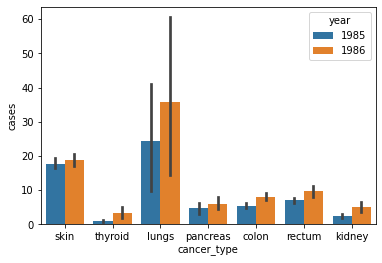

In [46]:
sns.barplot(data=cc, x="cancer_type", y="cases", hue="year")

<AxesSubplot:xlabel='location', ylabel='cases'>

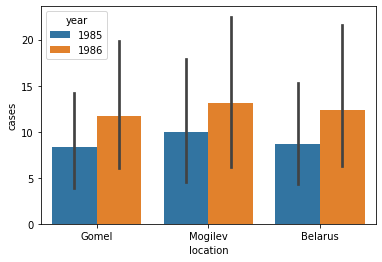

In [47]:
sns.barplot(data=cc, x="location", y="cases", hue="year")

#  Analysis

## Dependent t-test for changes over time

In [27]:
from scipy import stats

In [28]:
before = cc.loc[cc['year'] == 1985]
after = cc.loc[cc['year']== 1986]

### Test for Normality

<AxesSubplot:>

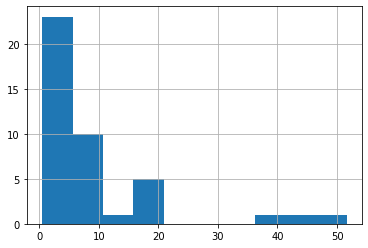

In [29]:
before['cases'].hist()

<AxesSubplot:>

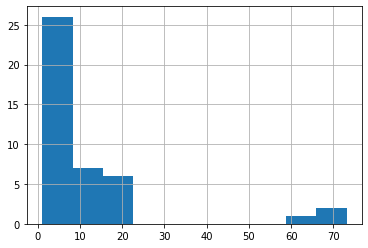

In [30]:
after['cases'].hist()

In [31]:
stats.ttest_rel(before['cases'], after['cases'])

Ttest_relResult(statistic=-4.244229373306208, pvalue=0.0001223256334804817)

## P Value is significant

In [32]:
before.cases.mean()

8.971428571428573

In [33]:
after.cases.mean()

12.404761904761905

# Cancer rates after Chernobyl were higher than before the accident